**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading data
books_df = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books_df.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users_df = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users_df.columns = ['userID', 'Location', 'Age']

ratings_df = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings_df.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

### Check no.of records and features given in each dataset
hint - check shape

In [3]:
books_df.shape

(271360, 8)

In [4]:
users_df.shape

(278858, 3)

In [5]:
ratings_df.shape

(1149780, 3)

## Exploring books dataset

### Drop last three columns containing image URLs which will not be required for analysis

In [6]:
books_df.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis = 1, inplace = True)

In [7]:
books_df.head(5)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [8]:
books_df['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [9]:
filter1 = books_df['yearOfPublication'] == 'DK Publishing Inc'

In [10]:
books_df[filter1]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [11]:
filter2 = books_df['yearOfPublication'] == 'Gallimard'

In [12]:
books_df[filter2]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [13]:
books_df.drop(index = books_df[filter1].index, inplace = True)

In [14]:
books_df.drop(index = books_df[filter2].index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### Change the datatype of yearOfPublication to 'int'

In [15]:
books_df['yearOfPublication'] = books_df['yearOfPublication'].astype('int64')

In [16]:
books_df.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [17]:
books_df['publisher'].isnull().sum()

2

In [18]:
books_df['publisher'].dropna(how = 'any', axis = 0, inplace = True)

In [19]:
books_df['publisher'].isnull().sum()

0

## Exploring Users dataset

### Get all unique values in ascending order for column `Age`

In [20]:
users_df.head(5)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [21]:
users_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [22]:
filter1 = users_df['Age'] < 5

In [23]:
users_df[filter1].head(5)

,userID,Location,Age
219,220,"bogota, bogota, colombia",0.0
469,470,"indianapolis, indiana, usa",0.0
561,562,"adfdaf, australian capital territory, albania",0.0
612,613,"ankara, n/a, turkey",1.0
670,671,"jeddah, jeddah, saudi arabia",1.0


In [24]:
users_df.loc[filter1, 'Age'] = np.nan

In [25]:
users_df[users_df['Age'] < 5]

,userID,Location,Age


In [26]:
filter1 = users_df['Age'] > 90

In [27]:
users_df[filter1].head(5)

,userID,Location,Age
1288,1289,"san jose, california, usa",103.0
1322,1323,"milano, lombardia, italy",104.0
1578,1579,"akure, ondo/nigeria, nigeria",231.0
3084,3085,"zürich, switzerland, switzerland",104.0
3210,3211,"le mesnil saint denis, yvelines, france",119.0


In [28]:
users_df.loc[filter1, 'Age'] = np.nan

In [29]:
users_df[users_df['Age'] > 90]

,userID,Location,Age


### Replace null values in column `Age` with mean

In [30]:
users_df['Age'].isnull().sum()

112074

In [31]:
users_df['Age'].fillna(users_df['Age'].mean(), axis = 0, inplace = True)

In [32]:
users_df['Age'].isnull().sum()

0

### Change the datatype of `Age` to `int`

In [33]:
users_df['Age'] = users_df['Age'].astype('int64')

In [34]:
print(sorted(users_df.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [35]:
ratings_df.shape

(1149780, 3)

In [36]:
ratings_df.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [37]:
ISBN = books_df['ISBN'].unique()

In [38]:
type(ISBN)

numpy.ndarray

In [39]:
new_ratings_df1 = ratings_df[ratings_df['ISBN'].isin(ISBN)]

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [40]:
users = users_df['userID'].unique()

In [41]:
users

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [42]:
new_ratings_df2 = ratings_df[ratings_df['userID'].isin(users)]

Merge the two newly created DataFrames
-----------------------------------------------------------

In [43]:
ratings_df = pd.merge(new_ratings_df1, new_ratings_df2)

In [44]:
ratings_df.shape

(1031132, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [45]:
filter1 = ratings_df['bookRating'] == 0

In [46]:
ratings_df[filter1].head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
7,276746,0425115801,0
8,276746,0449006522,0


In [47]:
ratings_df.drop(index = ratings_df[filter1].index, inplace = True)

In [48]:
ratings_df[filter1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,userID,ISBN,bookRating


### Find out which rating has been given highest number of times

In [49]:
ratings_df['bookRating'].mode()

0    8
dtype: int64

In [50]:
ratings_df.shape

(383841, 3)

<function matplotlib.pyplot.show(*args, **kw)>

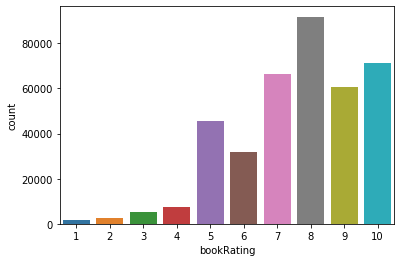

In [51]:
sns.countplot(data = ratings_df, x = 'bookRating')
plt.show

Observations
-------------------

From the mode calculation, it is clear that the rating 8 has been given highest number of times

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [52]:
ratings_df.head()

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
6,276744,038550120X,7
13,276747,0060517794,9


In [53]:
ratings_df.shape

(383841, 3)

In [54]:
ratings_df['userID'].mode()

0    11676
dtype: int64

In [55]:
df1 = ratings_df[ratings_df.groupby(['userID'])['bookRating'].transform('count') > 100]

In [56]:
df2 = df1.groupby(['userID']).count()[['ISBN']]

In [57]:
df2[df2['ISBN'] < 100]

,ISBN
userID,


Observations
-------------------

From the ratings_df, it is clear that no user is rated less than 100 books.

### Transform data to surprise format

In [58]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise.model_selection import train_test_split
reader = Reader(rating_scale=(1, 10))

### Points to Note:
1) Trainset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library


2) UserID and ISBN in the pandas dataframe can contain any value (either string/integer etc). However, Trainset convert these raw ids into numeric indexes called as "inner id"


3) Methods are provided to convert rw id to inner id and vice verca

### SVD Based Recommendation System

### Split the above data into trainset and testset

In [59]:
data = Dataset.load_from_df(ratings_df[['userID', 'ISBN', 'bookRating']], reader)
train_set, test_set = train_test_split(data, test_size = 0.30)

### Explore trainset and testset

In [60]:
train_set.n_users

55345

In [61]:
train_set.ir

defaultdict(list,
            {0: [(0, 10.0)],
             1: [(1, 8.0)],
             2: [(2, 7.0), (9222, 9.0), (10245, 5.0)],
             3: [(3, 10.0),
              (9285, 9.0),
              (1579, 8.0),
              (164, 5.0),
              (8786, 7.0),
              (3030, 9.0),
              (5294, 5.0),
              (1470, 8.0),
              (28733, 9.0),
              (2960, 9.0),
              (11304, 8.0),
              (2720, 9.0),
              (5071, 6.0),
              (36, 8.0),
              (8127, 7.0),
              (4820, 10.0),
              (8690, 8.0),
              (2161, 10.0),
              (43366, 9.0),
              (3224, 5.0),
              (6671, 10.0),
              (23190, 5.0),
              (9404, 9.0),
              (9578, 8.0),
              (36881, 10.0),
              (7756, 8.0),
              (584, 9.0),
              (3369, 8.0),
              (1314, 7.0)],
             4: [(4, 8.0)],
             5: [(5, 9.0),
              (4318, 7.0)

### Import SVD from Surprise and for on trainset

In [62]:
from surprise import SVD
from surprise import accuracy
from collections import defaultdict

In [63]:
model = SVD()

### Predict ratings for testset and check RMSE

In [64]:
model.fit(train_set)

In [65]:
predictions = model.test(test_set)

In [66]:
accuracy.rmse(predictions, verbose=True)

RMSE: 1.6432


1.6432221465098695

### Generating top n recommendations for a user

In [67]:
top_n = defaultdict(lambda : predictions)

top_n[1]
    
#for uid, iid, true_r, est, _ in predictions:
  #  top_n[uid].append((iid, est))

[Prediction(uid=85433, iid='0679879269', r_ui=9.0, est=9.081027829887066, details={'was_impossible': False}),
 Prediction(uid=123883, iid='0517146363', r_ui=5.0, est=5.037894944060374, details={'was_impossible': False}),
 Prediction(uid=247958, iid='0440201926', r_ui=10.0, est=8.707036695144895, details={'was_impossible': False}),
 Prediction(uid=180032, iid='0886777038', r_ui=7.0, est=7.066440899618909, details={'was_impossible': False}),
 Prediction(uid=75591, iid='0385315511', r_ui=9.0, est=8.203019056350843, details={'was_impossible': False}),
 Prediction(uid=249131, iid='051513239X', r_ui=7.0, est=7.003065650062842, details={'was_impossible': False}),
 Prediction(uid=41757, iid='0888620985', r_ui=8.0, est=7.689570193126738, details={'was_impossible': False}),
 Prediction(uid=128835, iid='0345298349', r_ui=9.0, est=8.14401322269537, details={'was_impossible': False}),
 Prediction(uid=170634, iid='0915793792', r_ui=10.0, est=8.534459887607486, details={'was_impossible': False}),
 Pr

In [68]:
def top_n_recommendations(preditions, n):
    top_n = defaultdict(lambda : list(preditions)
    
    for uid, iid, true_r, est, _ in preditions:
        top_n[0][uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

SyntaxError: invalid syntax (<ipython-input-68-bd8e23c69697>, line 4)

In [ ]:
top_n_recommendations(predictions, 10)